In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as sf
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, GlobalAveragePooling2D, Activation,MaxPooling2D,MaxPool2D
from tensorflow.keras.optimizers import SGD, Adam

## 讀入cifar10資料集

In [4]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data() 

170500096/170498071 [==============================] - 116s 1us/step


In [6]:
category= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## 檢視我們的測試資料

(-0.5, 31.5, 31.5, -0.5)

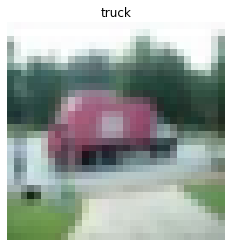

In [7]:
n = np.random.randint(X_train.shape[0])
X_sample = X_train[n]
y_sample = Y_train[n].squeeze()

plt.imshow(X_sample)
plt.title(category[y_sample])
plt.axis('off')

## 標準化資料
### 將資料轉成0到1之間

In [8]:
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

In [9]:
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

## 查看數據型態
### 圖片為32X32

In [11]:
print(X_train.shape, X_test.shape, sep="\n")

(50000, 32, 32, 3)
(10000, 32, 32, 3)


## 建立分類cifar10的卷積神經網路

In [19]:
CNN_layers = [Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(128, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(512, (3, 3), padding='same', activation='relu', name='Conv_3'),
              GlobalAveragePooling2D()]

FC_layers = [Dense(units=128, activation='relu'),
             Dense(units=10, activation='softmax')]

In [20]:
model = Sequential(CNN_layers + FC_layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 128)       36992     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 512)         590336    
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

## 組裝神經網路及訓練模型
### 設定訓練數值:batch_size = 300 ,epochs=10

In [21]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['categorical_accuracy'])

In [26]:
model.fit(X_train,Y_train, 
           batch_size=1000, 
           epochs=5,
          validation_data=(X_test, Y_test)
           )

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 352s 7ms/sample - loss: 1.6019 - categorical_accuracy: 0.4053 - val_loss: 1.5592 - val_categorical_accuracy: 0.4232
Epoch 2/5
50000/50000 [==============================] - 348s 7ms/sample - loss: 1.5435 - categorical_accuracy: 0.4312 - val_loss: 1.5124 - val_categorical_accuracy: 0.4429
Epoch 3/5
50000/50000 [==============================] - 345s 7ms/sample - loss: 1.4918 - categorical_accuracy: 0.4527 - val_loss: 1.5432 - val_categorical_accuracy: 0.4295
Epoch 4/5
50000/50000 [==============================] - 359s 7ms/sample - loss: 1.4535 - categorical_accuracy: 0.4683 - val_loss: 1.4095 - val_categorical_accuracy: 0.4879
Epoch 5/5
50000/50000 [==============================] - 350s 7ms/sample - loss: 1.4114 - categorical_accuracy: 0.4873 - val_loss: 1.3660 - val_categorical_accuracy: 0.5041


In [27]:
score_train = model.evaluate(X_train, Y_train)
score_test = model.evaluate(X_test, Y_test)
print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

10000/10000 [==============================] - 31s 3ms/sample - loss: 1.3660 - categorical_accuracy: 0.5041
Train Accuracy: 50.56599974632263
Test Accuracy: 50.41000247001648


In [28]:
model.save_weights('LeNet5_CIFAR10_HW.h5')

## 遷移學習 (Transfer Learning) 中的 Layer Transfer 的技巧

In [46]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

## 讀入 Fasion mnist

In [47]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [48]:
X_train_2 = X_train_2.reshape(60000, 28, 28, 1)/255
X_test_2 = X_test_2.reshape(10000, 28, 28, 1)/255
# One-hot encoding
y_train_2 = to_categorical(y_train_2, 10)
y_test_2 = to_categorical(y_test_2, 10)

## 建立Model2模型

### 重新設定fashion_mnist CNN layer

In [49]:
CNN_layers_mnist = [Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(128, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(512, (3, 3), padding='same', activation='relu', name='Conv_3'),
              GlobalAveragePooling2D()]

## 應用Transfer Learning : 使用model的FC_layer

In [55]:
model2 = Sequential(CNN_layers+FC_layers)
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 14, 14, 128)       36992     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 7, 7, 512)         590336    
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

## 訓練模型

In [56]:
model2.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['categorical_accuracy'])
model2.fit(X_train_2, y_train_2, batch_size=1000, epochs=5,validation_data=(X_test_2, y_test_2))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 333s 6ms/sample - loss: 0.9862 - categorical_accuracy: 0.6670 - val_loss: 0.7732 - val_categorical_accuracy: 0.7340
Epoch 2/5
60000/60000 [==============================] - 330s 6ms/sample - loss: 0.7053 - categorical_accuracy: 0.7463 - val_loss: 0.6788 - val_categorical_accuracy: 0.7509
Epoch 3/5
60000/60000 [==============================] - 329s 5ms/sample - loss: 0.6511 - categorical_accuracy: 0.7608 - val_loss: 0.6333 - val_categorical_accuracy: 0.7649
Epoch 4/5
60000/60000 [==============================] - 331s 6ms/sample - loss: 0.6103 - categorical_accuracy: 0.7769 - val_loss: 0.5999 - val_categorical_accuracy: 0.7801
Epoch 5/5
60000/60000 [==============================] - 331s 6ms/sample - loss: 0.5756 - categorical_accuracy: 0.7896 - val_loss: 0.5639 - val_categorical_accuracy: 0.7988


## 存下模型

In [57]:
model2.save_weights('transferlearning_HW_mnist.h5')

## 模型預測

In [58]:
model2.load_weights('transferlearning_HW_mnist.h5')

score_train = model2.evaluate(X_train_2, y_train_2)
score_test = model2.evaluate(X_test_2, y_test_2)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

10000/10000 [==============================] - 25s 3ms/sample - loss: 0.5639 - categorical_accuracy: 0.7988
Train Accuracy: 80.30999898910522
Test Accuracy: 79.8799991607666


## 查看舊模型的預測

In [61]:
score_train = model.evaluate(X_train, Y_train)
score_test = model.evaluate(X_test, Y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

10000/10000 [==============================] - 31s 3ms/sample - loss: 1.7696 - categorical_accuracy: 0.4080
Train Accuracy: 40.75399935245514
Test Accuracy: 40.79999923706055
